# Ejercicio 1: Estimacion ecuación lineal con dos parámetros
$y=\omega_1 · X_1 + \omega_2 · X_2 + cte.$

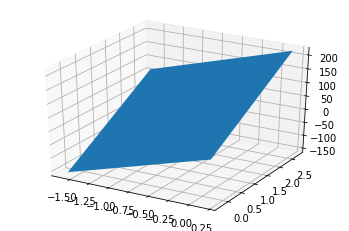

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter


cte = 2
x,y, coef= datasets.make_regression(random_state=42,n_features=2,coef=True,bias=cte)
omega = coef[0]
omega2 = coef[1]


#Imprimimos

fig = plt.figure()
ax = fig.gca(projection='3d')

#Para el 3D hace falta un grid
X, Y = np.meshgrid(x[0],x[1])
Z = X*omega + Y*omega2 + cte

# Plot the surface.
ax.plot_surface(X, Y, Z)


plt.show()

In [2]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

 
# Creamos la red neuronal
model = Sequential()

# Añadimos la Neurona, que está en una capa densa, con dos entradas (cada uno de
# los parámetros y la constane. La activación lineal devuelve el rango de reales
model.add(Dense(1, input_shape=(2,), use_bias=True, activation='linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [3]:


#La red ha inicializado los parámetros
weights = model.layers[0].get_weights()
print(weights)

xw_init = weights[0][0][0]
xw2_init = weights[0][1][0]

b_init = weights[1][0]


print("""\nModelo de regresion lineal inicializado con:
w1: %.2f w2: %.2f b: %.2f 
(Objetivo w1: %.2f  w2: %.2f b: %.2f)
""" % (xw_init, xw2_init, b_init, omega,omega2, cte))


model.compile(optimizer='sgd', loss='mean_squared_error')

print(x.shape)
print(x[:5,:])
model.fit(x,y, batch_size=1, epochs=30)


weights = model.layers[0].get_weights()
xw_fin = weights[0][0][0]
xw2_fin = weights[0][1][0]

b_fin = weights[1][0]


print("""\nModelo de regresion lineal Final con:
w1: %.2f w2: %.2f b: %.2f 
(Objetivo w1: %.2f  w2: %.2f b: %.2f)
""" % (xw_fin, xw2_fin, b_fin,omega,omega2, cte))

[array([[0.35223508],
       [0.27525032]], dtype=float32), array([0.], dtype=float32)]

Modelo de regresion lineal inicializado con:
w1: 0.35 w2: 0.28 b: 0.00 
(Objetivo w1: 87.74  w2: 74.08 b: 2.00)

(100, 2)
[[-1.60748323  0.18463386]
 [-0.26465683  2.72016917]
 [ 1.46564877 -0.2257763 ]
 [ 1.86577451  0.47383292]
 [-1.0708925   0.48247242]]
Epoch 1/30
100/100 [==============================] - 0s 1ms/step - loss: 3292.4524
Epoch 2/30
100/100 [==============================] - 0s 1ms/step - loss: 109.5569
Epoch 3/30
100/100 [==============================] - 0s 1ms/step - loss: 4.9914
Epoch 4/30
100/100 [==============================] - 0s 1ms/step - loss: 0.2616
Epoch 5/30
100/100 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 6/30
100/100 [==============================] - 0s 1ms/step - loss: 8.3148e-04
Epoch 7/30
100/100 [==============================] - 0s 1ms/step - loss: 4.7216e-05
Epoch 8/30
100/100 [==============================] - 0s 1ms/step - loss:

In [0]:

#Para el 3D hace falta un grid
Z_hat = X*xw_fin + Y*xw2_fin + b_fin

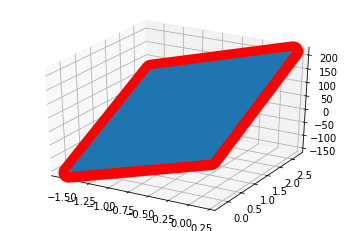

In [5]:

fig = plt.figure()
ax = fig.gca(projection='3d')


# Plot the surface.
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z_hat,alpha=0,linewidth=20, edgecolors='r')

plt.show()

# 2. Clasificación con redes neuronales

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris_X, iris_y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

# One hot encoded variable Y
from tensorflow.keras.utils import to_categorical
dummy_y = to_categorical(y_train)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(X_train, dummy_y,batch_size=100,epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 910us/step - loss: 2.2973 - accuracy: 0.3400
Epoch 2/200
1/1 [==============================] - 0s 873us/step - loss: 2.2758 - accuracy: 0.3400
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 2.2544 - accuracy: 0.3400
Epoch 4/200
1/1 [==============================] - 0s 758us/step - loss: 2.2333 - accuracy: 0.3400
Epoch 5/200
1/1 [==============================] - 0s 818us/step - loss: 2.2123 - accuracy: 0.3400
Epoch 6/200
1/1 [==============================] - 0s 750us/step - loss: 2.1915 - accuracy: 0.3400
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 2.1709 - accuracy: 0.3400
Epoch 8/200
1/1 [==============================] - 0s 906us/step - loss: 2.1505 - accuracy: 0.3400
Epoch 9/200
1/1 [==============================] - 0s 1ms/step - loss: 2.1304 - accuracy: 0.3400
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: 2.1104 - accuracy: 0.3400
Epoch 11/200
1/1 

In [0]:
y_score= model.predict(X_test)

In [12]:
y_score[:3]

array([[0.13324381, 0.42236432, 0.4443919 ],
       [0.56808937, 0.17169383, 0.26021677],
       [0.01694074, 0.35049483, 0.6325644 ]], dtype=float32)

In [13]:
y_test[:3]

array([1, 0, 2])

In [14]:
from sklearn.metrics import roc_auc_score
macro_roc_auc_ovr = roc_auc_score(y_test, y_score, multi_class="ovo",average="macro")
macro_roc_auc_ovr

0.9798611111111111

# 3. CIFAR 10


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


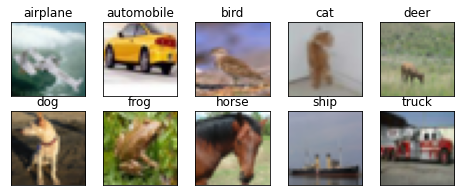

(32, 32, 3)


In [15]:
import tensorflow.keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
num_classes=10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (0, 1, 2))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()



# De clase a one hot enconder.
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

input_shape= x_train.shape[1:]
print(input_shape)

In [16]:
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 10
# epochs = 100

num_predictions = 20





model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8352 - accuracy: 0.3220 - val_loss: 1.5259 - val_accuracy: 0.4451
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4981 - accuracy: 0.4545 - val_loss: 1.3571 - val_accuracy: 0.5102
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3658 - accuracy: 0.5068 - val_loss: 1.2630 - val_accuracy: 0.5462
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2778 - accuracy: 0.5449 - val_loss: 1.2001 - val_accuracy: 0.5765
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2030 - accuracy: 0.5738 - val_loss: 1.1753 - val_accuracy: 0.5877
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1466 - accuracy: 0.5951 - val_loss: 1.0864 - val_accuracy: 0.6146
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0968 - accuracy: 0.6141 - val_loss: 1.0386 - val_accuracy:

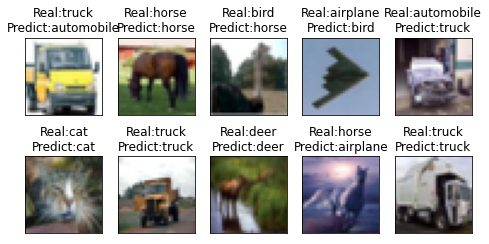

In [17]:
import random

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

y_hat = model.predict(x_test)
  
fig = plt.figure(figsize=(8,4))
idx = 0
for i in random.sample(range(x_test.shape[0]), 10):
    ax = fig.add_subplot(2, 5, 1 + idx, xticks=[], yticks=[])
    im = np.transpose(x_test[i], (0, 1, 2))
    ax.set_title("Real:" + class_names[np.argmax(y_test[i])] +"\nPredict:" +class_names[np.argmax(y_hat[i])])
    plt.imshow(im)
    idx +=1
plt.show()

# 4. LSTM

Basado en https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/8.1-text-generation-with-lstm.ipynb

Descargar el quijote desde https://gist.github.com/jsdario/6d6c69398cb0c73111e49f1218960f79
Descargar las mil y una noches:
* http://www.gutenberg.org/cache/epub/47287/pg47287.txt
* http://www.gutenberg.org/cache/epub/47631/pg47631.txt
* https://www.gutenberg.org/files/48903/48903-0.txt

In [18]:
# Descargar el texto
training_data_url = "https://gist.githubusercontent.com/jsdario/6d6c69398cb0c73111e49f1218960f79/raw/8d4fc4548d437e2a7203a5aeeace5477f598827d/el_quijote.txt"

!wget $training_data_url

--2020-06-02 12:53:58--  https://gist.githubusercontent.com/jsdario/6d6c69398cb0c73111e49f1218960f79/raw/8d4fc4548d437e2a7203a5aeeace5477f598827d/el_quijote.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1060259 (1.0M) [text/plain]
Saving to: ‘el_quijote.txt.1’

el_quijote.txt.1    100%[===================>]   1.01M  --.-KB/s    in 0.05s   

2020-06-02 12:53:59 (20.8 MB/s) - ‘el_quijote.txt.1’ saved [1060259/1060259]



In [19]:
import tensorflow.keras as keras
import numpy as np
import random
import sys

# Se lee el quijote y se recorta si hace falta
short=True

text = open('el_quijote.txt').read().lower()
if short:
    text=text[0:20000]
print('Corpus length:', len(text))
# Se divide en frases de 60 caracteres

# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))

# Se cogen los caracteres que aparecen el texto
# List of unique characters in the corpus
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

# Se realiza un one-hot encode
# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    if i==54:
        print("frase ",i,":",sentence,"\n\nx[0:1]:")
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
        if i==54 and t<2:
            print(char,"=",char_indices[char]," one-hot=",x[i, t,:])
    y[i, char_indices[next_chars[i]]] = 1
    if i==54:
        print("\n\ny:",next_chars[i],"=",char_indices[next_chars[i]]," onehot=",y[i,:])

Corpus length: 20000
Number of sequences: 6647
Unique characters: 42
Vectorization...
frase  54 : a
en un lugar de la mancha, de cuyo nombre no quiero acordar 

x[0:1]:
a = 13  one-hot= [False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]

 = 0  one-hot= [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


y: m = 24  onehot= [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False]


In [0]:
# Modelo LSTM

from tensorflow.keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))


optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [21]:
print("input_shape(frase,one_hot_chars):",(maxlen, len(chars)))
model.summary()

input_shape(frase,one_hot_chars): (60, 42)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               87552     
_________________________________________________________________
dense_5 (Dense)              (None, 42)                5418      
Total params: 92,970
Trainable params: 92,970
Non-trainable params: 0
_________________________________________________________________


# Predecir la siguiente letra

In [22]:
model.fit(x, y,
              batch_size=128,
              epochs=1)

52/52 [==============================] - 0s 7ms/step - loss: 2.8384


In [23]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text + '"')

--- Generating with seed: " pasar al modo de lo que había leído, luego que vió la ve"


In [0]:
# La cadena generated_text se irá rellenando con la predicción, por eso no se usa x y se usa sampled
sampled = np.zeros((1, maxlen, len(chars)))
for t, char in enumerate(generated_text):
    sampled[0, t, char_indices[char]] = 1.


In [25]:
print("letra",generated_text[0],"\nOne-hot=",sampled[0,0])

letra   
One-hot= [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
preds = model.predict(sampled, verbose=0)[0]

In [27]:
preds

array([2.3634215e-04, 5.2969450e-01, 3.2679560e-05, 2.1748008e-04,
       1.8320227e-04, 1.1937987e-04, 1.0302547e-02, 4.3632495e-03,
       3.3010299e-05, 2.4865896e-05, 1.1840522e-03, 4.4672153e-04,
       1.5748528e-04, 1.2077303e-02, 1.3803908e-02, 5.5322722e-02,
       1.3090099e-02, 1.1560323e-02, 3.4019204e-03, 7.4428744e-03,
       1.0204511e-03, 7.9704309e-03, 2.0784214e-03, 4.7183741e-02,
       2.5874583e-02, 9.4933093e-02, 6.6745402e-03, 4.4701584e-03,
       4.1104811e-03, 5.2634280e-02, 5.7607304e-02, 9.0122363e-03,
       4.2235316e-03, 1.1792200e-03, 1.6883800e-04, 2.5248183e-03,
       1.7828937e-03, 7.2568422e-05, 2.7366523e-05, 1.1983600e-02,
       7.4330572e-04, 2.9510260e-05], dtype=float32)

In [28]:
print("Para el texto:",generated_text)
print("La siguiente letra con mayor probabilidad es:",chars[np.argmax(preds)])

Para el texto:  pasar al modo de lo que había leído, luego que vió la ve
La siguiente letra con mayor probabilidad es:  


# Prediciendo una frase

In [29]:
# Estimamos un poco mas
model.fit(x, y,
          batch_size=128,
          epochs=100)

Epoch 1/100
52/52 [==============================] - 0s 6ms/step - loss: 2.3496
Epoch 2/100
52/52 [==============================] - 0s 6ms/step - loss: 2.1443
Epoch 3/100
52/52 [==============================] - 0s 6ms/step - loss: 2.0155
Epoch 4/100
52/52 [==============================] - 0s 6ms/step - loss: 1.9060
Epoch 5/100
52/52 [==============================] - 0s 6ms/step - loss: 1.8059
Epoch 6/100
52/52 [==============================] - 0s 6ms/step - loss: 1.7000
Epoch 7/100
52/52 [==============================] - 0s 6ms/step - loss: 1.5993
Epoch 8/100
52/52 [==============================] - 0s 6ms/step - loss: 1.4744
Epoch 9/100
52/52 [==============================] - 0s 6ms/step - loss: 1.3423
Epoch 10/100
52/52 [==============================] - 0s 6ms/step - loss: 1.2053
Epoch 11/100
52/52 [==============================] - 0s 6ms/step - loss: 1.0790
Epoch 12/100
52/52 [==============================] - 0s 6ms/step - loss: 0.9702
Epoch 13/100
52/52 [=================

In [30]:
for j in range(3):
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    print('\n\n--- Generating with seed: "' + generated_text + '"')

    #vamos a iterar
    for i in range(120):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.
        #print("\n frase:",generated_text)
        preds = model.predict(sampled, verbose=0)[0]
        #print(preds)
        next_index = np.argmax(preds)
        next_char = chars[next_index]

        # Se mueve la cadena de caracteres para asegurar la longitud de entrada
        generated_text += next_char
        generated_text = generated_text[1:]
        sys.stdout.write(next_char)
        sys.stdout.flush()



--- Generating with seed: "rmonía la venida de la rosada aurora que dejando la blanda "
las malenas pens malentra de las pedas perque era nu había lligaba a su panía les almina de esta velida en estripios, 

--- Generating with seed: " tal le pareció a él el ventero y la venta), respondió: p"
or mía, se quen él una nomhel que estaba mi blencas, y al ino todo aquellas, se los máta cauncalle, de mus uno se heb

--- Generating with seed: " ama que tenía y aun a su sobrina de añadidura.
en efecto,"
 tomargo y de preber que él un se estribi un hombre de su toco fue caballero, se domerdis gigante más tancinante a su 